In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset Hospital Visit Perfromance.csv")

In [5]:
df.head()

,VisitID,PatientID,PatientName,Age,Gender,City,Department,Doctor,VisitDate,Symptoms,Diagnosis,TreatmentCost,PaymentMethod
0,1,2809,Janice Nelson,69,Male,Mumbai,Gynecology,Rebecca Peters,2024-10-25,Skin Rash,Viral Infection,25303,Cash
1,2,4870,Ryan Hubbard,46,Female,Kolkata,General Medicine,Timothy Parker,2023-05-28,Fever,Dehydration,37147,Credit Card
2,3,2412,Michael Williams,5,Male,Bengaluru,Pediatrics,Michael Shannon,2024-11-18,Check-up,Sprain,22498,Insurance
3,4,4680,Melissa Wright,4,Female,Hyderabad,Orthopedics,Jennifer Booker,2023-06-09,Fatigue,Normal,19297,Insurance
4,5,2819,Kristi Parker,15,Male,Pune,Pediatrics,Troy Curry,2024-01-24,Injury,Flu,6609,Credit Card


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   VisitID        10000 non-null  int64 
 1   PatientID      10000 non-null  int64 
 2   PatientName    10000 non-null  object
 3   Age            10000 non-null  int64 
 4   Gender         10000 non-null  object
 5   City           10000 non-null  object
 6   Department     10000 non-null  object
 7   Doctor         10000 non-null  object
 8   VisitDate      10000 non-null  object
 9   Symptoms       10000 non-null  object
 10  Diagnosis      10000 non-null  object
 11  TreatmentCost  10000 non-null  int64 
 12  PaymentMethod  10000 non-null  object
dtypes: int64(4), object(9)
memory usage: 1015.8+ KB


#### We need to change datatype of visitdate column to datetime

In [11]:
df['VisitDate'] = pd.to_datetime(df['VisitDate'])

In [25]:
df.isnull().sum()

VisitID          0
PatientID        0
PatientName      0
Age              0
Gender           0
City             0
Department       0
Doctor           0
VisitDate        0
Symptoms         0
Diagnosis        0
TreatmentCost    0
PaymentMethod    0
dtype: int64

In [24]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.nunique()

VisitID          10000
PatientID         3657
PatientName       9340
Age                 89
Gender               3
City                 7
Department           8
Doctor            9410
VisitDate          731
Symptoms             9
Diagnosis            9
TreatmentCost     9014
PaymentMethod        4
dtype: int64

In [47]:
cat = ['Gender', 'City', 'Department', 'Symptoms', 'Diagnosis', 'PaymentMethod', 'Age_category']

In [48]:
for i in cat:
    print(df[i].unique())

['Male' 'Female' 'Other']
['Mumbai' 'Kolkata' 'Bengaluru' 'Hyderabad' 'Pune' 'Delhi' 'Chennai']
['Gynecology' 'General Medicine' 'Pediatrics' 'Orthopedics' 'ENT'
 'Cardiology' 'Neurology' 'Dermatology']
['Skin Rash' 'Fever' 'Check-up' 'Fatigue' 'Injury' 'Cough' 'Pain'
 'Headache' 'Cold']
['Viral Infection' 'Dehydration' 'Sprain' 'Normal' 'Flu' 'Migraine'
 'Fracture' 'Dermatitis' 'Allergy']
['Cash' 'Credit Card' 'Insurance' 'UPI']
['Senior' 'Middle_aged' 'Child' 'Adult']


#### Extracting Year, Month, Quarter and day from visit date for better understanding of visit trends

In [32]:
df['Year'] = df['VisitDate'].dt.year
df['Month'] = df['VisitDate'].dt.month_name()
df['Quarter'] = df['VisitDate'].dt.quarter
df['Day'] = df['VisitDate'].dt.day_name()

In [66]:
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
df['Day'] = pd.Categorical(df['Day'], categories=day_order, ordered=True)

In [36]:
#df.head()

#### To get more insights from age column we will need to categorise it

In [136]:
def conv(val):
    if val <= 18:
        return "Child"
    elif 18 < val <= 45:
        return "Adult"
    elif 45 < val <= 65:
        return "Middle_aged"
    else:
        return "Senior"

df['Age_category'] = df['Age'].apply(conv)

#### Categorical Univariate Analysis

In [39]:
df.columns

Index(['VisitID', 'PatientID', 'PatientName', 'Age', 'Gender', 'City',
       'Department', 'Doctor', 'VisitDate', 'Symptoms', 'Diagnosis',
       'TreatmentCost', 'PaymentMethod', 'Year', 'Month', 'Quarter', 'Day',
       'Age_category'],
      dtype='object')

In [49]:
cat

['Gender',
 'City',
 'Department',
 'Symptoms',
 'Diagnosis',
 'PaymentMethod',
 'Age_category']

In [46]:
print("Total no of Patient: ", df['PatientID'].nunique())

Total no of Patient:  3657


In [54]:
df['Gender'].value_counts(normalize=True)*100

Gender
Male      48.53
Female    47.29
Other      4.18
Name: proportion, dtype: float64

In [137]:
for i in cat:
    print(i)
    print(df[i].value_counts(normalize=True)*100)
    print()

Gender
Gender
Male      48.53
Female    47.29
Other      4.18
Name: proportion, dtype: float64

City
City
Mumbai       14.84
Kolkata      14.64
Delhi        14.52
Bengaluru    14.47
Pune         13.97
Chennai      13.90
Hyderabad    13.66
Name: proportion, dtype: float64

Department
Department
Gynecology          12.78
Orthopedics         12.78
Cardiology          12.73
Dermatology         12.57
Pediatrics          12.35
General Medicine    12.35
Neurology           12.27
ENT                 12.17
Name: proportion, dtype: float64

Symptoms
Symptoms
Headache     11.59
Pain         11.35
Check-up     11.26
Fatigue      11.26
Fever        11.14
Injury       11.06
Cold         10.92
Skin Rash    10.83
Cough        10.59
Name: proportion, dtype: float64

Diagnosis
Diagnosis
Viral Infection    11.98
Migraine           11.68
Flu                11.30
Dermatitis         11.03
Sprain             11.03
Allergy            11.02
Normal             10.78
Fracture           10.75
Dehydration        1

#### If we do analysis of visits, we can say that All Gender, City, Department, Symptoms, Diagnosis have similar no of visits
#### Payment method is also equally distributed 
#### But among total visits, almost 30% visits are by Adult, 27% are by seniors and Child group contributes lowest

In [138]:
df_age = df['Age_category'].value_counts(normalize=True)*100
df_age

Age_category
Adult          30.14
Senior         27.35
Middle_aged    22.23
Child          20.28
Name: proportion, dtype: float64

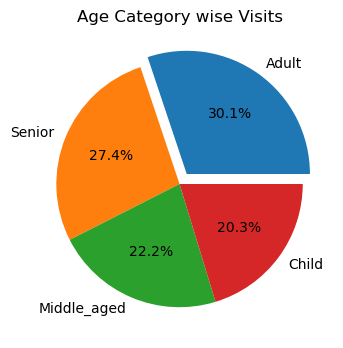

In [139]:
plt.figure(figsize=(4,4))
plt.pie(df_age, labels=df_age.index, autopct='%1.1f%%', explode=(0.1,0,0,0))
plt.title("Age Category wise Visits")
plt.show()

In [70]:
df['Year'].value_counts()

Year
2023    5049
2024    4951
Name: count, dtype: int64

In [77]:
df.groupby('Year')['Month'].value_counts().unstack()

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2023,432,365,421,401,410,444,428,412,415,471,402,448
2024,414,377,437,364,445,380,417,430,413,397,425,452


C:\Users\SR\AppData\Local\Temp\ipykernel_23452\2076807611.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_visits = df.groupby(['Year', 'Month']).size().reset_index(name='Total_Visits')


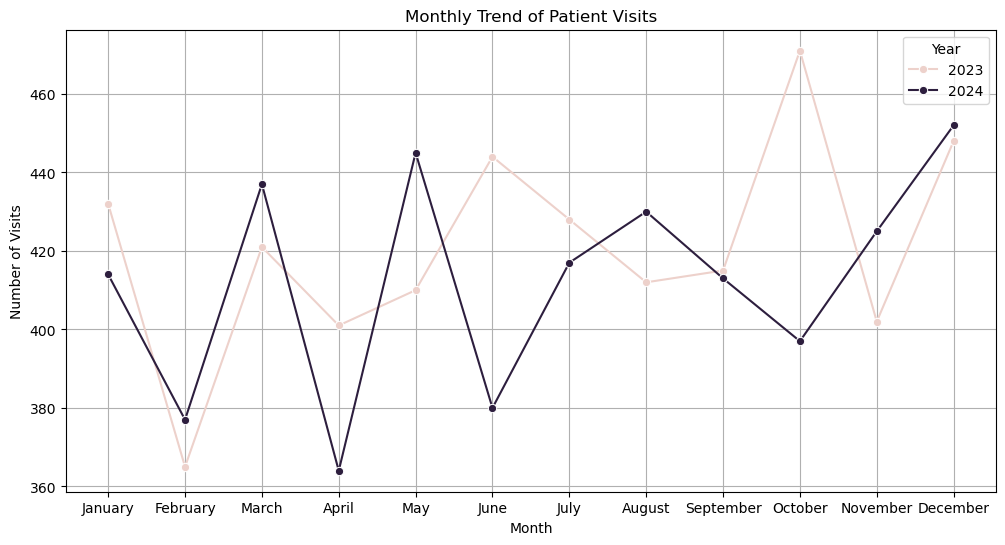

In [146]:
monthly_visits = df.groupby(['Year', 'Month']).size().reset_index(name='Total_Visits')

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_visits, x='Month', y='Total_Visits', hue='Year', marker='o')
plt.title('Monthly Trend of Patient Visits')
plt.xlabel('Month')
plt.ylabel('Number of Visits')
plt.xticks(monthly_visits['Month'].unique())
plt.grid(True)
plt.show()

In [76]:
df.groupby('Year')['Quarter'].value_counts().unstack()

Quarter,1,2,3,4
Year,,,,
2023,1218,1255,1255,1321
2024,1228,1189,1260,1274


In [133]:
df['Day'].value_counts()

Day
Friday       1465
Sunday       1458
Tuesday      1446
Monday       1443
Saturday     1420
Wednesday    1406
Thursday     1362
Name: count, dtype: int64

#### Slight decrease in no of visits from 2023 to 2024
#### Patients visit increases as the year ends (Q4 having most visits)

### Hospital Performance

In [78]:
df.columns

Index(['VisitID', 'PatientID', 'PatientName', 'Age', 'Gender', 'City',
       'Department', 'Doctor', 'VisitDate', 'Symptoms', 'Diagnosis',
       'TreatmentCost', 'PaymentMethod', 'Year', 'Month', 'Quarter', 'Day',
       'Age_category'],
      dtype='object')

In [83]:
print("Total Revenue: ", df['TreatmentCost'].sum())

Total Revenue:  252777079


In [88]:
df.groupby('Year')['TreatmentCost'].sum()

Year
2023    127297023
2024    125480056
Name: TreatmentCost, dtype: int64

In [89]:
df.groupby('Quarter')['TreatmentCost'].sum()

Quarter
1    61907130
2    62022124
3    64009180
4    64838645
Name: TreatmentCost, dtype: int64

In [80]:
df['Department'].value_counts()

Department
Gynecology          1278
Orthopedics         1278
Cardiology          1273
Dermatology         1257
Pediatrics          1235
General Medicine    1235
Neurology           1227
ENT                 1217
Name: count, dtype: int64

In [81]:
df.groupby('Gender')['Department'].value_counts()

Gender  Department      
Female  Orthopedics         613
        Cardiology          604
        Dermatology         604
        Neurology           594
        ENT                 588
        Gynecology          585
        General Medicine    571
        Pediatrics          570
Male    Gynecology          644
        Orthopedics         616
        General Medicine    614
        Pediatrics          614
        Dermatology         601
        Cardiology          599
        Neurology           589
        ENT                 576
Other   Cardiology           70
        ENT                  53
        Dermatology          52
        Pediatrics           51
        General Medicine     50
        Gynecology           49
        Orthopedics          49
        Neurology            44
Name: count, dtype: int64

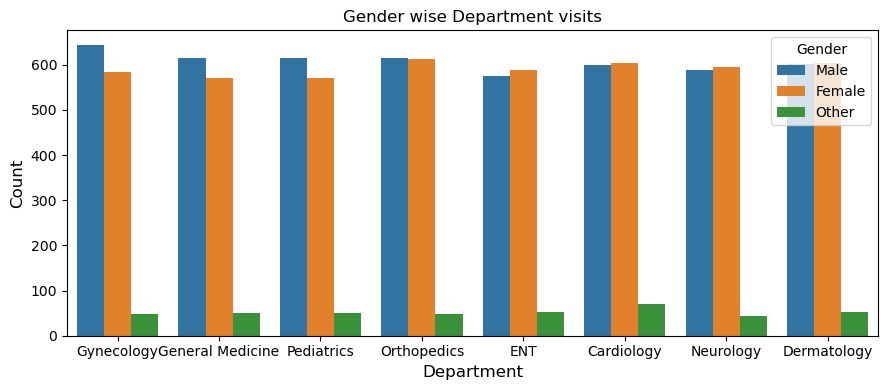

In [101]:
plt.figure(figsize=(9,4))
sns.countplot(df, x='Department', hue='Gender')
plt.title("Gender wise Department visits")
plt.xlabel('Department', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
plt.show()

In [92]:
df_rev= df.groupby('Department')['TreatmentCost'].sum()
df_rev

Department
Cardiology          31303956
Dermatology         31522825
ENT                 31030838
General Medicine    30881497
Gynecology          31949341
Neurology           30916631
Orthopedics         33348860
Pediatrics          31823131
Name: TreatmentCost, dtype: int64

### 💰 Revenue & Cost Analysis

In [104]:
df.groupby('Department')['TreatmentCost'].mean().round(2)

Department
Cardiology          24590.70
Dermatology         25077.82
ENT                 25497.81
General Medicine    25005.26
Gynecology          24999.48
Neurology           25196.93
Orthopedics         26094.57
Pediatrics          25767.72
Name: TreatmentCost, dtype: float64

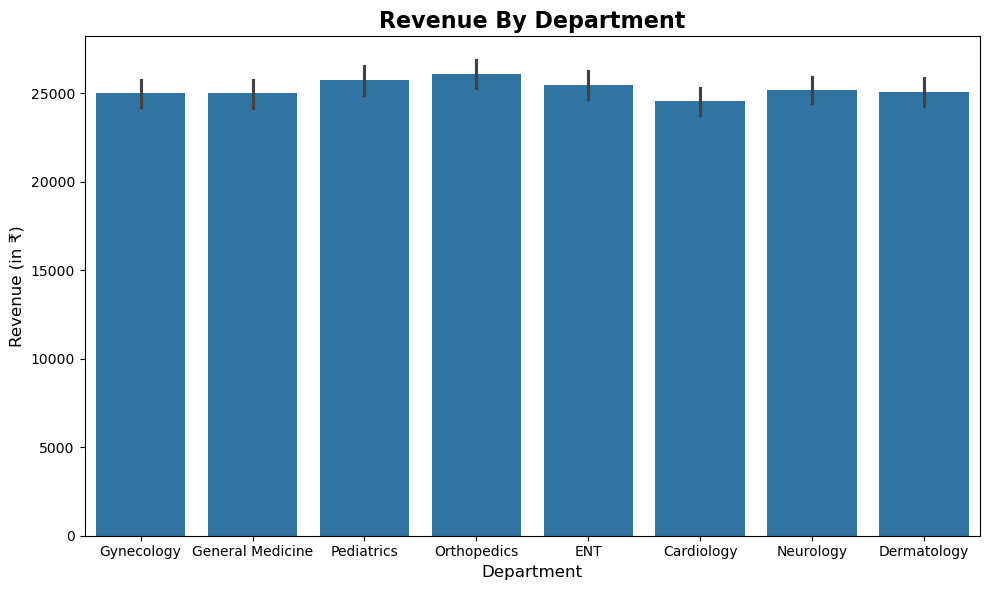

In [102]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Department', y='TreatmentCost')
plt.title('Revenue By Department', fontsize=16, fontweight='bold')
plt.xlabel('Department', fontsize=12)
plt.ylabel('Revenue (in ₹)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [105]:
df.groupby('Diagnosis')['TreatmentCost'].mean().round(2)

Diagnosis
Allergy            24776.64
Dehydration        25718.80
Dermatitis         24710.98
Flu                25445.96
Fracture           25277.09
Migraine           25244.50
Normal             25772.14
Sprain             25353.48
Viral Infection    25235.95
Name: TreatmentCost, dtype: float64

In [107]:
df.groupby('PaymentMethod')['TreatmentCost'].sum()

PaymentMethod
Cash           62187988
Credit Card    65942363
Insurance      64047427
UPI            60599301
Name: TreatmentCost, dtype: int64

In [108]:
df.groupby('PaymentMethod')['TreatmentCost'].mean()

PaymentMethod
Cash           25156.953074
Credit Card    25768.801485
Insurance      25305.186488
UPI            24856.152994
Name: TreatmentCost, dtype: float64

In [116]:
top_visits = (df.groupby('Doctor')['VisitID']
                .count()
                .sort_values(ascending=False)
                .head(5)
                .reset_index(name='Total_Visits'))

print("Top 5 Doctors by Patient Visits")
print(top_visits)

Top 5 Doctors by Patient Visits
                 Doctor  Total_Visits
0  Christopher Williams             6
1      Michael Williams             6
2        Emily Williams             5
3        Jennifer Jones             5
4        Kimberly Smith             5


In [117]:
top_revenue = (df.groupby('Doctor')['TreatmentCost']
                 .sum()
                 .sort_values(ascending=False)
                 .head(5)
                 .reset_index(name='Total_Revenue'))

print("\nTop 5 Doctors by Revenue")
print(top_revenue)


Top 5 Doctors by Revenue
                 Doctor  Total_Revenue
0      Michael Williams         167499
1            John Smith         159898
2      Jennifer Johnson         154488
3        Kimberly Smith         152527
4  Christopher Williams         151517


In [141]:
df.groupby('Age_category')['TreatmentCost'].mean()

Age_category
Adult          25391.435965
Child          25271.683432
Middle_aged    25508.596941
Senior         24969.179525
Name: TreatmentCost, dtype: float64

In [150]:
monthly_revenue = df.groupby(['Year', 'Month'])['TreatmentCost'].sum().reset_index()
print(monthly_revenue)

    Year      Month  TreatmentCost
0   2023    January       11062696
1   2023   February        9117389
2   2023      March       10951781
3   2023      April       10286007
4   2023        May       10191367
5   2023       June       11230921
6   2023       July       10516596
7   2023     August       10505251
8   2023  September       10722810
9   2023    October       11421318
10  2023   November       10177461
11  2023   December       11113426
12  2024    January       10298689
13  2024   February        9555418
14  2024      March       10921157
15  2024      April        9278906
16  2024        May       11571169
17  2024       June        9463754
18  2024       July       10134638
19  2024     August       11022749
20  2024  September       11107136
21  2024    October       10035626
22  2024   November       10931070
23  2024   December       11159744


C:\Users\SR\AppData\Local\Temp\ipykernel_23452\3336370167.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_revenue = df.groupby(['Year', 'Month'])['TreatmentCost'].sum().reset_index()


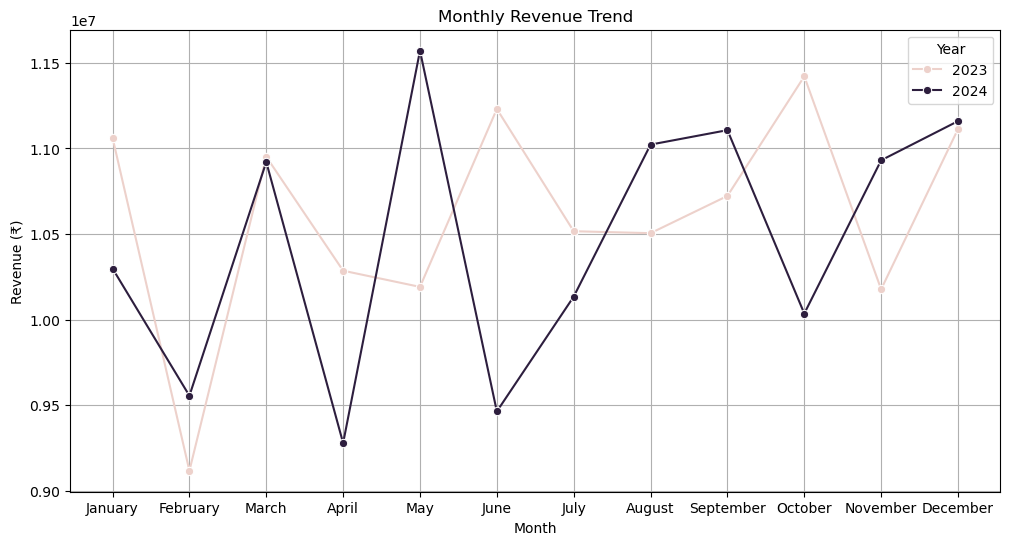

In [151]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_revenue, x='Month', y='TreatmentCost', hue='Year', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue (₹)')
plt.xticks(monthly_revenue['Month'].unique())
plt.grid(True)
plt.show()


In [165]:
df.groupby('City')['TreatmentCost'].sum().sort_values()

City
Hyderabad    34185785
Pune         35029456
Chennai      35300327
Bengaluru    36784640
Delhi        36975215
Mumbai       37245834
Kolkata      37255822
Name: TreatmentCost, dtype: int64

In [167]:
df.groupby('City')['TreatmentCost'].mean().round(2).sort_values()

City
Hyderabad    25026.20
Pune         25074.77
Mumbai       25098.27
Chennai      25395.92
Bengaluru    25421.31
Kolkata      25447.97
Delhi        25465.02
Name: TreatmentCost, dtype: float64

### 🧪 Symptoms & Diagnosis

In [110]:
df['Symptoms'].value_counts()

Symptoms
Headache     1159
Pain         1135
Check-up     1126
Fatigue      1126
Fever        1114
Injury       1106
Cold         1092
Skin Rash    1083
Cough        1059
Name: count, dtype: int64

In [111]:
df.groupby('Gender')['Diagnosis'].value_counts()

Gender  Diagnosis      
Female  Migraine           572
        Viral Infection    552
        Sprain             542
        Dermatitis         531
        Allergy            520
        Normal             512
        Flu                507
        Fracture           501
        Dehydration        492
Male    Viral Infection    597
        Flu                574
        Migraine           553
        Allergy            534
        Normal             522
        Sprain             522
        Dermatitis         519
        Fracture           518
        Dehydration        514
Other   Fracture            56
        Dermatitis          53
        Flu                 49
        Viral Infection     49
        Allergy             48
        Normal              44
        Migraine            43
        Sprain              39
        Dehydration         37
Name: count, dtype: int64

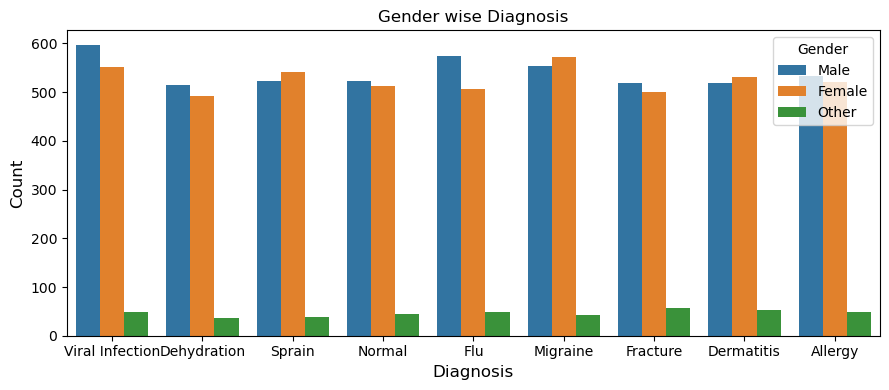

In [112]:
plt.figure(figsize=(9,4))
sns.countplot(df, x='Diagnosis', hue='Gender')
plt.title("Gender wise Diagnosis")
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
plt.show()

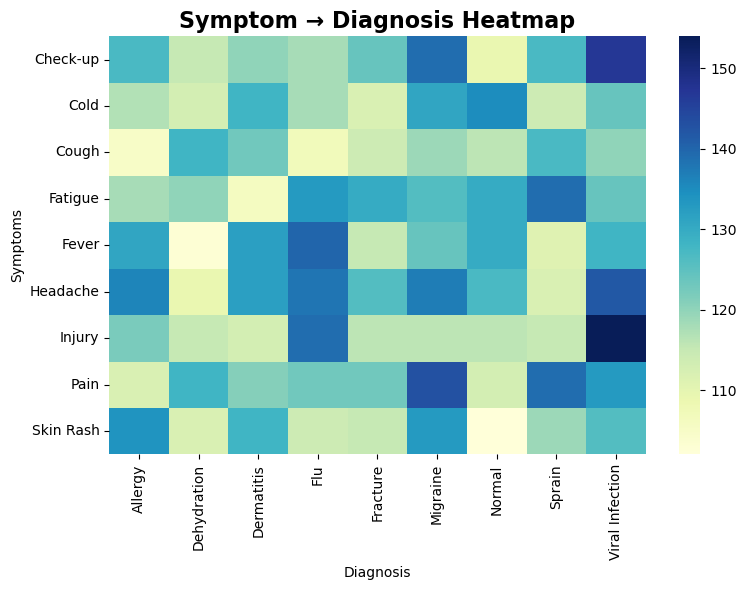

In [115]:
sym_diag = pd.crosstab(df['Symptoms'], df['Diagnosis'])

plt.figure(figsize=(8,6))
sns.heatmap(sym_diag, annot=False, cmap='YlGnBu')
plt.title("Symptom → Diagnosis Heatmap", fontsize=16, fontweight='bold')
plt.xlabel("Diagnosis")
plt.ylabel("Symptoms")
plt.tight_layout()
plt.show()


In [119]:
df.columns

Index(['VisitID', 'PatientID', 'PatientName', 'Age', 'Gender', 'City',
       'Department', 'Doctor', 'VisitDate', 'Symptoms', 'Diagnosis',
       'TreatmentCost', 'PaymentMethod', 'Year', 'Month', 'Quarter', 'Day',
       'Age_category'],
      dtype='object')

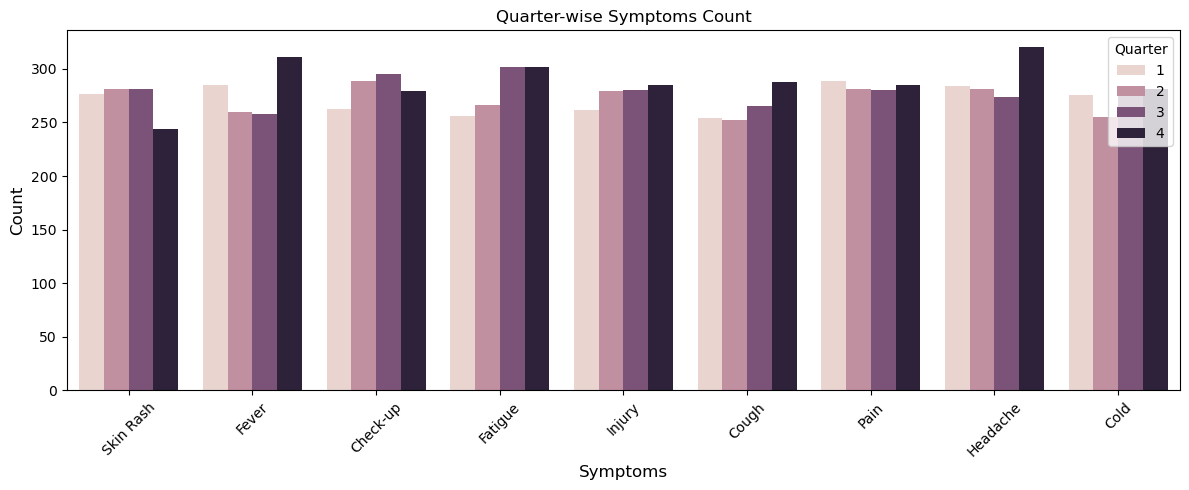

In [163]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Symptoms', hue='Quarter')
plt.title("Quarter-wise Symptoms Count")
plt.xlabel("Symptoms", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
